## League of Legends Project

### Authors: Kyle, Ross, Joe

## Overview and Buisness Problem

### The goal of this project was to take a League of Legends dataset located on Kaggle and turn it in to a model that a coach would be able to use 10 minutes into a game to predict the outcome of that game. We used multiple logistic regression models as well as Decision Tree classifiers, Bagged tress, Random Forest Classifier, Gradient Boosting classifier, Ada boosting classifier, XGBoost, and K-nearest neighbors to produce the best model possible. Our best model can predict the winner with 72.71% accuracy. 

## Modeling Process

### This notebook goes through our entire process for data cleaning, modeling, and evaluation.

## Exploratory Data Analysis

## Data Cleaning

### In the first step we needed to decide what stats would a coach have at 10 minutes in the game from just watching and listening to the team radio. After much discusion we decided to drop 20 of our 40 columns because some of the columns the coach would not know mid game and other columns were inversely related to others. 

## Importing all the necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings(action='ignore') 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier, GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix


### Reading in the csv

In [27]:
df = pd.read_csv('../../../high_diamond_ranked_10min.csv')
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


## Checking to see if there is a big class imbalance

0    4949
1    4930
Name: blueWins, dtype: int64


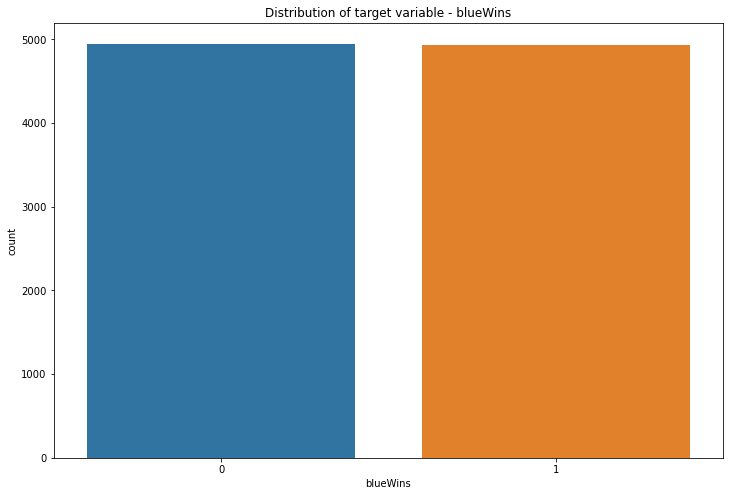

In [8]:
plt.figure(figsize=(12,8))
plt.title('Distribution of target variable - blueWins')
plt.ylabel('Amount of wins')
sns.countplot(df['blueWins'])
print(df['blueWins'].value_counts())

### ok so not a big class imbalance at all. Almost even with each other so we will not need to use SMOTE to correct it. 

<AxesSubplot:>

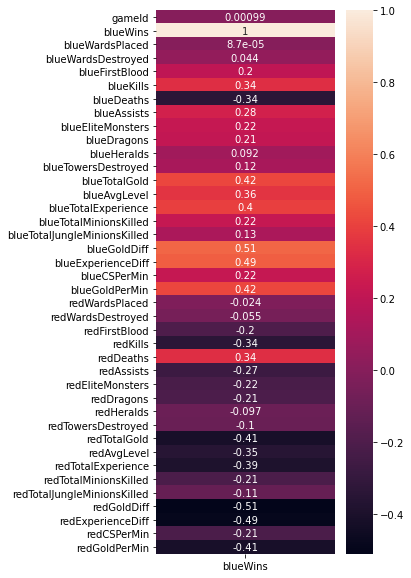

In [28]:
fig = plt.figure(figsize=(4, 10))
sns.heatmap(df.corr()[['blueWins']], annot=True)


AttributeError: 'DataFrame' object has no attribute 'coef_'

### This is where we decided to drop 20 of our columns

In [9]:
df = df.drop(['gameId','blueEliteMonsters','blueTotalGold','blueTotalExperience','blueGoldDiff', 'blueExperienceDiff', 'blueCSPerMin','blueGoldPerMin','redFirstBlood', 'redEliteMonsters',
'redTotalGold', 'redTotalExperience', 'redGoldDiff', 'redExperienceDiff', 'redCSPerMin','redGoldPerMin','redWardsPlaced', 'redWardsDestroyed','blueDeaths', 'redDeaths'], axis=1)

KeyError: "['gameId' 'blueEliteMonsters' 'blueTotalGold' 'blueTotalExperience'\n 'blueGoldDiff' 'blueExperienceDiff' 'blueCSPerMin' 'blueGoldPerMin'\n 'redFirstBlood' 'redEliteMonsters' 'redTotalGold' 'redTotalExperience'\n 'redGoldDiff' 'redExperienceDiff' 'redCSPerMin' 'redGoldPerMin'\n 'redWardsPlaced' 'redWardsDestroyed' 'blueDeaths' 'redDeaths'] not found in axis"

In [10]:
df.describe()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueAssists,blueDragons,blueHeralds,blueTowersDestroyed,blueAvgLevel,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,redKills,redAssists,redDragons,redHeralds,redTowersDestroyed,redAvgLevel,redTotalMinionsKilled,redTotalJungleMinionsKilled
count,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,0.499038,22.288288,2.824881,0.504808,6.183925,6.645106,0.361980,0.187974,0.051422,6.916004,216.699565,50.509667,6.137666,6.662112,0.413098,0.160036,0.043021,6.925316,217.349226,51.313088
std,0.500024,18.019177,2.174998,0.500002,3.011028,4.064520,0.480597,0.390712,0.244369,0.305146,21.858437,9.898282,2.933818,4.060612,0.492415,0.366658,0.216900,0.305311,21.911668,10.027885
min,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.600000,90.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.800000,107.000000,4.000000
25%,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,0.000000,0.000000,0.000000,6.800000,202.000000,44.000000,4.000000,4.000000,0.000000,0.000000,0.000000,6.800000,203.000000,44.000000
50%,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,7.000000,218.000000,50.000000,6.000000,6.000000,0.000000,0.000000,0.000000,7.000000,218.000000,51.000000
75%,1.000000,20.000000,4.000000,1.000000,8.000000,9.000000,1.000000,0.000000,0.000000,7.200000,232.000000,56.000000,8.000000,9.000000,1.000000,0.000000,0.000000,7.200000,233.000000,57.000000
max,1.000000,250.000000,27.000000,1.000000,22.000000,29.000000,1.000000,1.000000,4.000000,8.000000,283.000000,92.000000,22.000000,28.000000,1.000000,1.000000,2.000000,8.200000,289.000000,92.000000


### Creating two train splits so that our test set never sees the light of day until we are ready to test our best model. 

In [11]:
X = df.drop('blueWins',axis=1)
y = df.blueWins
X_tr, X_test, y_tr, y_test = train_test_split(X,y,random_state=42)

In [12]:
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, random_state=42)

### We made a function so that it is easier to fit and predict with every model

In [13]:
def modeling_function(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)

    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)

    print('Training accuracy:', accuracy_score(y_train, train_preds))
    print("validation accuracy: ", accuracy_score(y_val, val_preds))

    return model

## Scaling our data

In [14]:
scaler = StandardScaler()

### Only ever fit to the training data and never to the test data or in this case the validation data. 

In [15]:
scaler.fit(X_train)

StandardScaler()

In [16]:
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
X_val_scaled = pd.DataFrame(scaler.transform(X_val), columns=X.columns)

## First model is a Decision Tree Classifier

In [11]:
dtc = DecisionTreeClassifier(random_state=42)

In [12]:
dtc_fitted = modeling_function(dtc, X_train_scaled, y_train, X_val_scaled, y_val)

Training accuracy: 1.0
validation accuracy:  0.6087425796006476


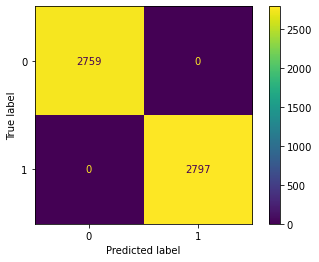

In [13]:
plot_confusion_matrix(dtc_fitted, X_train_scaled, y_train)

### Doing a grid search to hopfully make this model better

In [14]:
param_grid = {'criterion': ["gini", "entropy"],
             'max_leaf_nodes': [2,3,4,5,6,7,8,9,10,11,12,13,14],
             'max_depth': [2,3,4,5,6,7,8,9,10,11,12]
             }

In [15]:
dtc_gs = GridSearchCV(estimator=dtc, param_grid=param_grid, scoring='accuracy')

In [16]:
dtc_gs.fit(X_train_scaled, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14]},
             scoring='accuracy')

In [17]:
dtc_gs_model = dtc_gs.best_estimator_

In [18]:
dtc_gs.best_params_

{'criterion': 'entropy', 'max_depth': 6, 'max_leaf_nodes': 12}

## Making our 2nd DTC model using the best paramaters that we found with the grid search

In [14]:
dtc2 = DecisionTreeClassifier(max_depth=6, max_leaf_nodes=12, random_state=42, criterion='entropy')

In [15]:
modeling_function(dtc2, X_train_scaled, y_train, X_val_scaled, y_val)

Training accuracy: 0.6985241180705544
validation accuracy:  0.7053426875337291


DecisionTreeClassifier(criterion='entropy', max_depth=6, max_leaf_nodes=12,
                       random_state=42)

### Using the grid search helped and reduced the problem of overfitting.

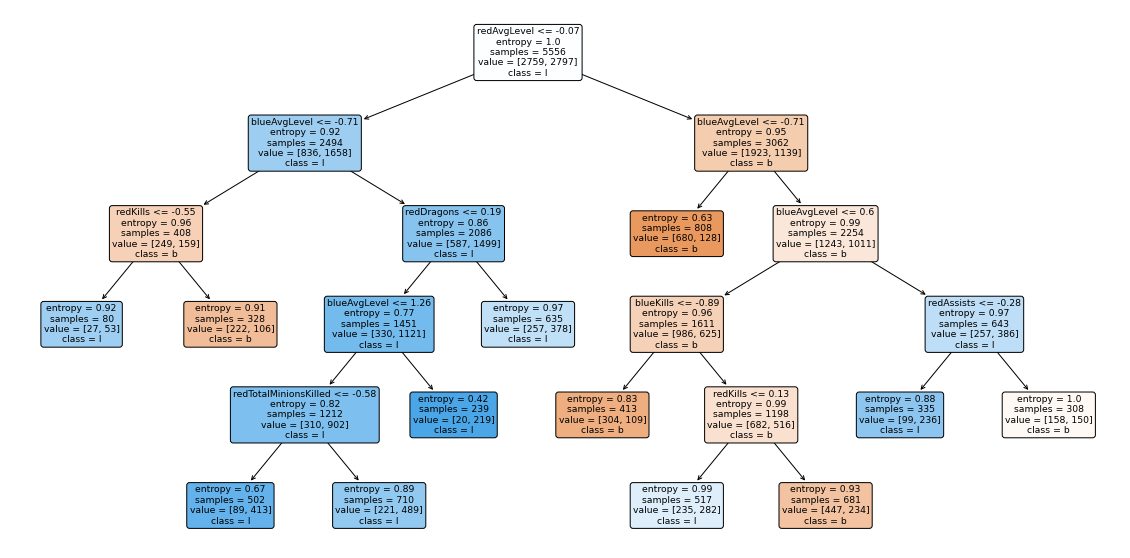

In [16]:


final_tree_model = DecisionTreeClassifier(max_depth = 6,max_leaf_nodes=12, random_state=42, criterion='entropy')
final_tree_model.fit(X_train_scaled, y_train)
predictions = final_tree_model.predict(X_val_scaled)
plt.figure(figsize=(20,10)) 
_ = plot_tree(final_tree_model, feature_names = X_train.columns, class_names = 'blueWins',
                rounded = True, proportion = False, precision = 2, filled = True)



## 1st Logistic Regression Model

In [52]:
logreg = LogisticRegression()

In [53]:
logreg_fitted = modeling_function(logreg, X_train_scaled, y_train, X_val_scaled, y_val)

Training accuracy: 0.7192224622030238
validation accuracy:  0.7404209390178089


### ok so not terrible but lets use a grid search to trind and improve it some

## 2nd Log model using a grid search

In [24]:
logreg2 = LogisticRegression(n_jobs=-1)

In [25]:
param_grid3 = {'penalty': ['l1', 'l2'],
            'C': [.3,.5,.7,.9,.1,.13,.15,.2,.25],
            'max_iter': [1000,2000,3000,4000,5000,7000,9000],
            'verbose': [1,2,3,4,5,6]}

In [26]:
logreg_gs = GridSearchCV(estimator=logreg2, param_grid=param_grid3, scoring='accuracy')

In [27]:
logreg_gs.fit(X_train_scaled, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out

GridSearchCV(estimator=LogisticRegression(n_jobs=-1),
             param_grid={'C': [0.3, 0.5, 0.7, 0.9, 0.1, 0.13, 0.15, 0.2, 0.25],
                         'max_iter': [1000, 2000, 3000, 4000, 5000, 7000, 9000],
                         'penalty': ['l1', 'l2'],
                         'verbose': [1, 2, 3, 4, 5, 6]},
             scoring='accuracy')

In [28]:
model2 = logreg_gs.best_estimator_

In [31]:
logreg_gs.best_params_

{'C': 0.1, 'max_iter': 1000, 'penalty': 'l2', 'verbose': 1}

In [54]:
logreg3 = LogisticRegression(n_jobs=-1, C = .1, max_iter=1000, penalty = 'l2', verbose=1)

In [55]:
modeling_function(logreg3, X_train_scaled, y_train, X_val_scaled, y_val)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Training accuracy: 0.7201223902087833
validation accuracy:  0.7393416082029142


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.3s finished


LogisticRegression(C=0.1, max_iter=1000, n_jobs=-1, verbose=1)

### It looks like using the grid search helped our training accuracy a little bit. 

## XGboost #1 and #2 

### #1 is going to be base line and #2 is setting up for our gridsearch

In [21]:
XGB = XGBClassifier(n_jobs=-1)

XGB2 = XGBClassifier(n_jobs=-1,eval_metric='mlogloss')



In [22]:
modeling_function(XGB, X_train_scaled, y_train, X_val_scaled, y_val)

[13:48:11] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training accuracy: 0.9560835133189345
validation accuracy:  0.6999460334592552


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### setting paramaters for our gridsearch

In [104]:
param_grid2 = {'learning_rate': [.01,.03,.05,.07],
             'n_estimators': [300,500,700,1000],
             'max_depth': [1,2,3,4,5,6,7,8]
             }

In [42]:
XGB_gs = GridSearchCV(estimator=XGB2, param_grid=param_grid2, scoring='accuracy')

In [43]:
XGB_gs.fit(X_train_scaled, y_train)

In [44]:
model3 = XGB_gs.best_estimator_

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [45]:
 XGB_gs.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

## Using best paramaters from our gridsearch for our final XGboost model

In [23]:
XGB3 = XGBClassifier(learning_rate=0.01, n_estimators=700, n_jobs=-1,max_depth=2)

In [24]:
modeling_function(XGB3, X_train_scaled, y_train, X_val_scaled, y_val)

[13:48:18] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training accuracy: 0.728581713462923
validation accuracy:  0.7350242849433352


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=700, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### That is looking much better then our original XGBoost model

## 1st Ada boost model

In [17]:
adaboost_clf = AdaBoostClassifier()

In [18]:
modeling_function(adaboost_clf, X_train_scaled, y_train, X_val_scaled, y_val)

Training accuracy: 0.7251619870410367
validation accuracy:  0.7226119805720453


AdaBoostClassifier()

### using a grid search to try and improve our model

In [16]:
param_grid3 = {'learning_rate': [.01,.02,.03,.04,.05,.06,.07,.08],
             'n_estimators': [300,500,700,1000]}

In [17]:
adaboost_clf_gs = GridSearchCV(estimator=adaboost_clf, param_grid=param_grid3, scoring='accuracy')

In [18]:
adaboost_clf_gs.fit(X_train_scaled, y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06,
                                           0.07, 0.08],
                         'n_estimators': [300, 500, 700, 1000]},
             scoring='accuracy')

### Finding the best paramaters

In [19]:
model = adaboost_clf_gs.best_estimator_

In [20]:
adaboost_clf_gs.best_params_

{'learning_rate': 0.02, 'n_estimators': 1000}

## 2nd Ada Boost model

In [27]:
adaboost_clf2 = AdaBoostClassifier(learning_rate=.02, n_estimators=1000)

In [28]:
modeling_function(adaboost_clf2, X_train_scaled, y_train, X_val_scaled, y_val)

Training accuracy: 0.7258819294456443
validation accuracy:  0.7269293038316244


AdaBoostClassifier(learning_rate=0.02, n_estimators=1000)

### It looks like it only helped the model slightly

## Bagged tree model

In [29]:
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), 
                                 n_estimators=20)

In [30]:
modeling_function(bagged_tree, X_train_scaled, y_train, X_val_scaled, y_val)

Training accuracy: 0.7332613390928726
validation accuracy:  0.7236913113869401


BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                  n_estimators=20)

## Random Forest model

In [31]:
forest = RandomForestClassifier(n_estimators=1000, max_depth= 5)

In [32]:
modeling_function(forest, X_train_scaled, y_train, X_val_scaled, y_val)

Training accuracy: 0.7377609791216703
validation accuracy:  0.7317862924986508


RandomForestClassifier(max_depth=5, n_estimators=1000)

## Gradient Boost model

In [33]:
gbt_clf = GradientBoostingClassifier()

In [34]:
modeling_function(gbt_clf, X_train_scaled, y_train, X_val_scaled, y_val)

Training accuracy: 0.7451403887688985
validation accuracy:  0.7285483000539665


GradientBoostingClassifier()

## Time to test our models against the test data

In [19]:
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

In [60]:
test_preds = adaboost_clf.predict(X_test_scaled)

In [61]:
accuracy_score(y_test, test_preds)

0.7271255060728745

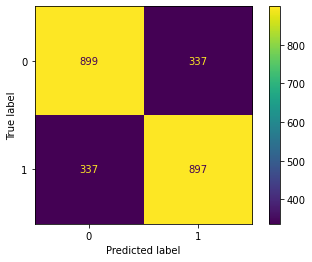

In [68]:
plot_confusion_matrix(adaboost_clf, X_test_scaled, y_test)

## Testing our model on an actual game


In [43]:
df2 = pd.read_csv('Practice2.csv')
df2 = df2.drop('blueWins', axis=1)
df2

,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueAssists,blueDragons,blueHeralds,blueTowersDestroyed,blueAvgLevel,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,redKills,redAssists,redDragons,redHeralds,redTowersDestroyed,redAvgLevel,redTotalMinionsKilled,redTotalJungleMinionsKilled
0,22,3,1,6,6,1,0,1,7,217,51,6,6,0,1,1,7,216,49


In [44]:
df2_scaled = scaler.transform(df2)

In [45]:
adaboost_clf.predict(df2_scaled)

array([1], dtype=int64)

## Finding most important coefficients

In [43]:
logreg3_coefs = pd.DataFrame(np.abs(logreg3.coef_.T), columns=['coefficient'], index=X_train_scaled.columns)

In [44]:
sorted_coefs = logreg3_coefs.sort_values(by='coefficient', ascending=False)

In [45]:
sorted_coefs

,coefficient
blueKills,0.585336
redKills,0.549571
redAvgLevel,0.218780
blueAvgLevel,0.189608
blueTotalJungleMinionsKilled,0.165330
blueTotalMinionsKilled,0.160752
redDragons,0.151052
redTotalMinionsKilled,0.108822
blueTowersDestroyed,0.108350
redTotalJungleMinionsKilled,0.089364


In [46]:
def plot_feature_importances(model):
    plt.figure(figsize=(14,8))
    pd.Series(abs(model.coef_[0]),index=X_train_scaled.columns).sort_values().plot(kind='barh', color='lightblue')
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
    #(np.abs(logreg3.coef_.T), columns=['coefficient'], index=X_train_scaled.columns)

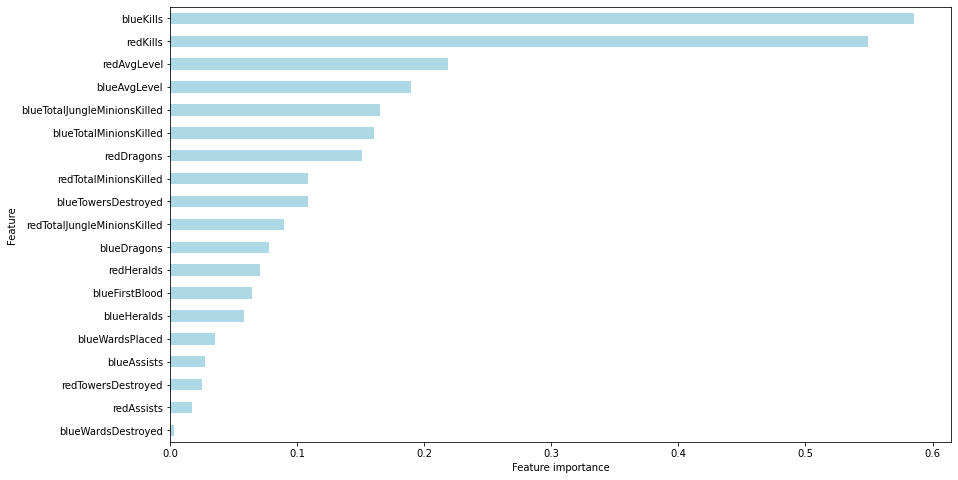

In [48]:
plot_feature_importances(logreg3)

[Text(0.5, 0, 'Blue Wins'), Text(0, 0.5, 'Average Red Kills')]

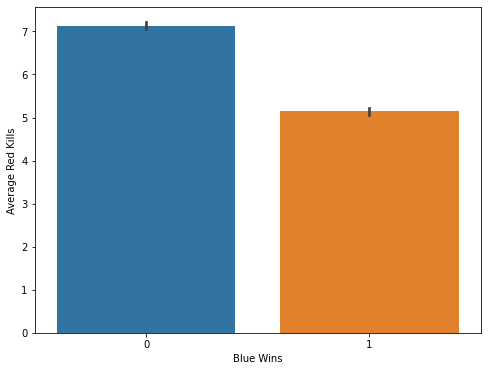

In [46]:
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.barplot(x = "blueWins", y = "redKills", data=df)
ax.set(xlabel="Blue Wins", ylabel = "Average Red Kills")

[Text(0.5, 0, 'Blue Wins'), Text(0, 0.5, 'Average Blue Kills')]

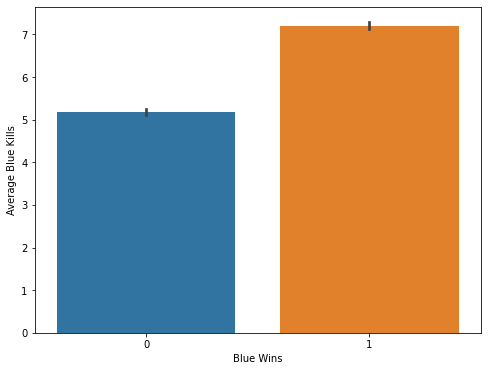

In [47]:
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.barplot(x = "blueWins", y = "blueKills", data=df)
ax.set(xlabel="Blue Wins", ylabel = "Average Blue Kills")

[Text(0.5, 0, 'Blue Wins'), Text(0, 0.5, 'Average Red Level')]

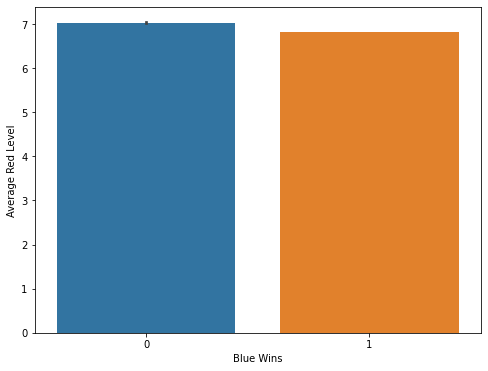

In [48]:
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.barplot(x = "blueWins", y = "redAvgLevel", data=df)
ax.set(xlabel="Blue Wins", ylabel = "Average Red Level")

[Text(0.5, 0, 'Blue Wins'), Text(0, 0.5, 'Average Blue Level')]

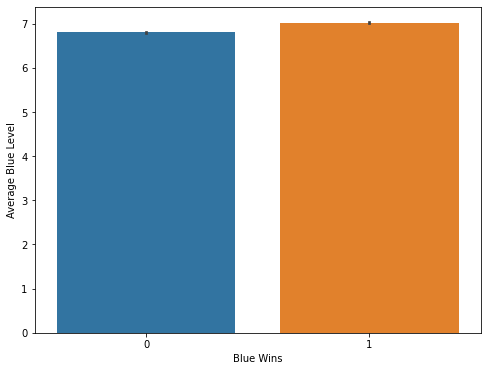

In [49]:
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.barplot(x = "blueWins", y = "blueAvgLevel", data=df)
ax.set(xlabel="Blue Wins", ylabel = "Average Blue Level")

<AxesSubplot:xlabel='blueWins', ylabel='blueTotalJungleMinionsKilled'>

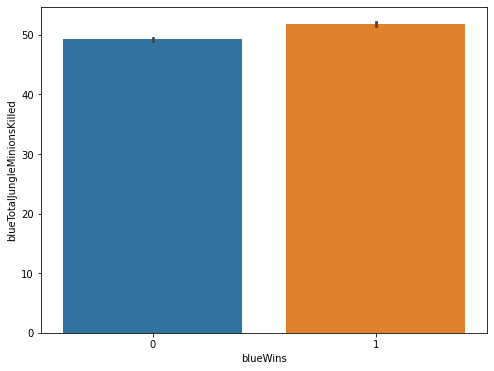

In [50]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(data=df, x='blueWins', y='blueTotalJungleMinionsKilled', ax=ax)

## Evaluation

Our best model was our 1st Ada Boost model. This gaves us a 72.71% accuracy. This means that when you input variables into our model it can corretly predict the winner 72.71% of the time. Both logistic regression models were within a few tenths of a percent of our Ada Boost model and surprisingly our 2nd Ada boost model that used paramaters from a grid search performed worse then our Model with basic paramaters.  

## Conclusion 

### As seen on the correlation graph at the beginning, gold difference is by far the most important variable for our model. The fact that Experience difference is the second most important, probably means that farming is one of the most efficient ways to earn gold(also, it gives you more experience at a lower risk). This most likely means one should be paying more attention to farming and lane phase than getting kills. However since a coach does not have access to this information during the game they are not valuable to our model but they are very valuable to the players. Our most influential features are red kills and blue kills meaning that sometime taking the risk of going for that kill might just be worth it in the end. Blue avg level and Red avg level are also both highly important features in our model and the only way to increase your teams average level is by getting those kills and minion kills. So this all means that how you play the first 10 minutes of a match most of the time can be the difference between winning and loosing. 

## Next Steps

### For next steps we would like to do some api calls so that way we are able to have more rows and a lot more columns to hopfully improve upon our model. We would like to know things such as the items bought by each player as well as the champion they selected because both of those features can play a big role in determining the outcome of the game. 